In [1]:
%load_ext autoreload
%aimport dbUtils
%autoreload 2
import matplotlib.pyplot as pyplot

In [3]:
polyglots = dbUtils.runQuery('''
    SELECT * FROM crm20.lb_polyglots
    ORDER BY sec_loc DESC
''', True)
display(polyglots)

Time used: 0.020801782608032227


,author_id,java_loc,java_start,java_end,secondary_languages,sec_loc,sec_start,sec_end
0,518570,610901.0,2012-09-14 20:15:46,2019-05-29 13:04:57,[js],[374850],[2015-06-19 19:51:59],[2018-10-06 06:02:11]
1,1482481,797088.0,2014-02-24 19:49:00,2017-10-09 21:49:19,[js],[284106],[2014-05-09 21:48:51],[2017-10-09 21:49:19]
2,3435994,279855.0,2016-06-17 11:21:53,2019-05-22 15:49:21,[js],[221171],[2016-11-15 13:40:40],[2019-05-08 09:53:56]
3,71304,210258.0,2008-12-27 23:11:25,2017-02-14 23:38:23,"[js, py]","[162301, 2270]","[2009-11-20 02:27:15, 2010-03-16 13:49:14]","[2014-09-09 14:07:57, 2010-04-19 18:13:12]"
4,664441,254539.0,2009-04-13 20:55:37,2013-03-11 08:23:39,[js],[161424],[2009-04-13 21:21:32],[2014-05-15 00:20:02]
...,...,...,...,...,...,...,...,...
1540,2410458,6149.0,2014-07-06 15:06:12,2015-03-28 20:06:53,[js],[1004],[2018-10-19 10:59:21],[2018-12-09 14:03:53]
1541,7639819,18859.0,2015-10-03 18:59:18,2018-01-10 00:20:38,[py],[1004],[2017-09-18 19:28:09],[2017-12-21 10:20:55]
1542,86479,389352.0,2011-11-07 20:30:21,2018-01-05 14:33:43,[js],[1003],[2012-02-29 15:06:49],[2018-03-08 22:54:17]
1543,3751266,6009.0,2014-05-19 16:11:19,2016-10-20 13:53:22,[js],[1002],[2014-06-02 07:07:39],[2016-05-25 21:23:05]


In [5]:
testUserRow = dbUtils.runQuery('''
    SELECT * FROM crm20.lb_polyglots
    ORDER BY sec_loc DESC
''', True).iloc[1]
testUser = testUserRow['author_id']
print(testUser)

Time used: 0.018677949905395508
1482481


In [23]:
testUserRepos = dbUtils.runQuery('''
    SELECT DISTINCT url
    FROM ght.project_members, ght.projects
    WHERE user_id = {}
    AND repo_id = id
    AND language = 'Java'
'''.format(testUser))
display(testUserRepos)

Time used: 0.39128875732421875


,url
0,https://api.github.com/repos/ESSICS/LiveDirsFX
1,https://api.github.com/repos/ESSICS/Medusa
2,https://api.github.com/repos/ESSICS/graphics
3,https://api.github.com/repos/ESSICS/ikonli
4,https://api.github.com/repos/ESSICS/javafxsvg
5,https://api.github.com/repos/ESSICS/maven-osgi...
6,https://api.github.com/repos/ESSICS/medusademo
7,https://api.github.com/repos/ESSICS/org.csstud...
8,https://api.github.com/repos/ESSICS/phoebus
9,https://api.github.com/repos/ESSICS/radialchart


In [24]:
def urlMap(url):
    split = url.split('/')
    user = split[-2]
    project = split[-1]
    return (user, project)

repos = list(map(urlMap, testUserRepos['url']))

In [25]:
start = time.time()
with Pool(int(multiprocessing.cpu_count()/4)) as pool:
    allMetrics = pool.map(functools.partial(averageMetricPerCommitForRepo, metricFunction=repoAnalysis.lambdaDensity), repos)
allMetrics = list(map(lambda wrap: wrap.data, allMetrics))
chainMap = collections.ChainMap(*allMetrics)
end = time.time()
print('Total Time used: '+str(end - start))

Time used for ('ESSICS', 'graphics'): 0.31122303009033203
Could not download repo "ESSICS/regulators": Cmd('git') failed due to: exit code(128)
  cmdline: git clone --bare -v https://github.com/ESSICS/regulators.git /mnt/brick/crm20/repos/ESSICS/regulators.git
  stderr: 'Cloning into bare repository '/mnt/brick/crm20/repos/ESSICS/regulators.git'...
fatal: could not read Username for 'https://github.com': No such device or address
'Could not download repo "ESSICS/medusademo": Cmd('git') failed due to: exit code(128)
  cmdline: git clone --bare -v https://github.com/ESSICS/medusademo.git /mnt/brick/crm20/repos/ESSICS/medusademo.git
  stderr: 'Cloning into bare repository '/mnt/brick/crm20/repos/ESSICS/medusademo.git'...
fatal: could not read Username for 'https://github.com': No such device or address
'

Could not download repo "ESSICS/LiveDirsFX": Cmd('git') failed due to: exit code(128)
  cmdline: git clone --bare -v https://github.com/ESSICS/LiveDirsFX.git /mnt/brick/crm20/repos/ESSIC

In [66]:
testUserCommits = dbUtils.runQuery('''
    SELECT sha
    FROM crm20.lb_sample_commits
    WHERE author_id = {}
'''.format(testUser), True)['sha']
display(testUserCommits)
deltaMap = deltasOf(chainMap)
metrics = map(lambda sha: deltaMap.get(sha), testUserCommits)
metrics = filter(lambda obj: obj != None and obj[1] < 1, metrics)
metrics = sorted(metrics, key=lambda obj: obj[0])
metrics = list(metrics)

0       f68a1f8104f0de5d043164d3ee8fb302d6b546ef
1       92a395277bfa401d42dbdd9bc9cb92fc0e3589e2
2       d3aa9ac272ba9ff8f5a44cd32b555ae0d1891a14
3       c0e85fab5ce86b4b227fef3ee0f9cf4582205ea1
4       f2885f4d6f9df00350b8b5265fe97f6119f671f4
                          ...                   
3086    e9b30e0708e6a0bec1755846f85efee4c10402f2
3087    67a528e7c094ec785ef39562a9ec74284a805559
3088    3977a67863873293e71d93f83ccd6c41ade207a0
3089    0c617ec499c62227e35c4fb36388e889d90a2e9b
3090    5686a71384a4dad17b3c8cb26927ec41e83048c0
Name: sha, Length: 3091, dtype: object

In [58]:
for x in deltaMap.values(): print(x)

(1571837476, 0.0, 'ac509d592fa952de3173a5714592e3565300da1e')
(1566396079, 0.005753739930955959, '2a8f7d6e6fe038f9bb2f87904621d01d67c66837')
(1562678521, 0.0, '475ffafe59a9bb5e7194c4599dff11d6b6cda2a3')
(1562677670, 0.0010069044879159605, '76daaa5fa1c5fca9eecee2d3420fcf5a18075643')
(1562676198, -5.2117209520474717e-05, '58b1a7ecc89a04ce2a7cb92fcd64f01a70bbb963')
(1562673743, 0.00652090525508342, '58b1a7ecc89a04ce2a7cb92fcd64f01a70bbb963')
(1562330203, -0.0005068770891547558, '326a443bec23f9365cfd86e891e6bd3fdb9c7d01')
(1562329112, -0.0005068770891547558, '561381f7ef3d938cc46de233674ce7191be34606')
(1562322113, 0.002531645569622043, 'cf795ca92bc9cbac91e99d089a6704a47d01c07b')
(1562320329, 0.0, '1a16587d6a9fe2333913fbca2c3f3c7bd1d078bc')
(1562318472, 0.0003540763034415306, 'ba576be0732534e26a18cace6bbc5521f272deb8')
(1562318314, 0.006811309942555965, 'c27c98bc9f7f53837ee7af39e2ca28b470aba25c')
(1562312749, -0.005758864719556556, '561381f7ef3d938cc46de233674ce7191be34606')
(1561639082, -4

In [46]:
pyplot.figure(figsize=(20, 10))
plotByDate(metrics)

# At which point in their 'career' did developers start to learn their languages?

### Absolute

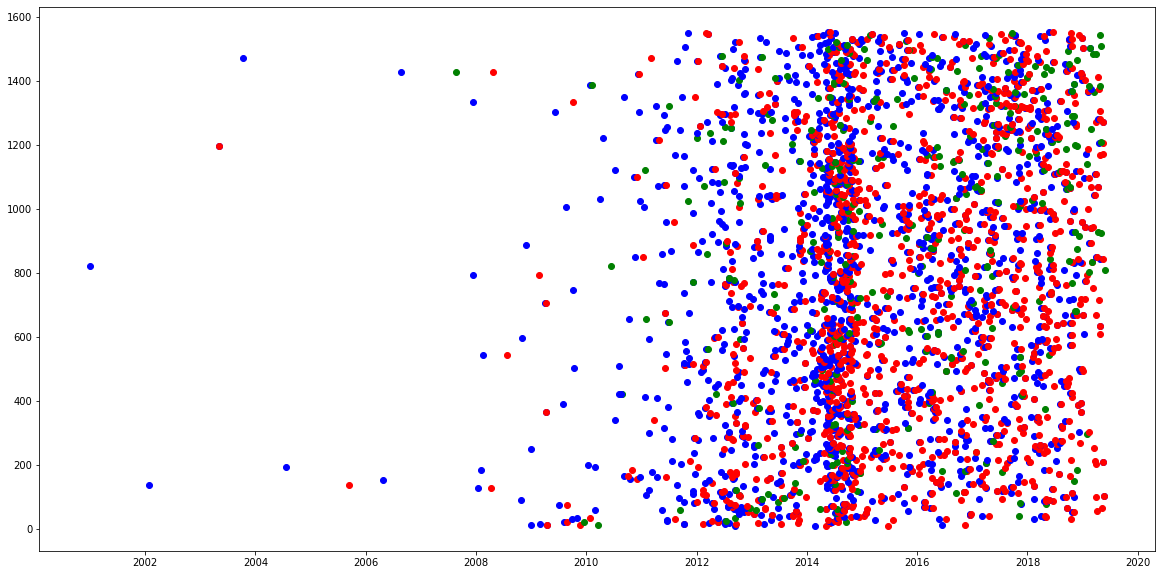

In [7]:
pyplot.figure(figsize=(20, 10))
for index, row in polyglots.iterrows():
    javastart = row['java_start']
    langs = row['secondary_languages']
    starts = row['sec_start']
    pyplot.plot_date([javastart], [index+10], 'ob')
    for lang, start in zip(langs, starts):
        color = 'r' if lang == 'js' else 'g'
        pyplot.plot_date([start], [index+10], 'o'+color)

### Relative

<BarContainer object of 10 artists>

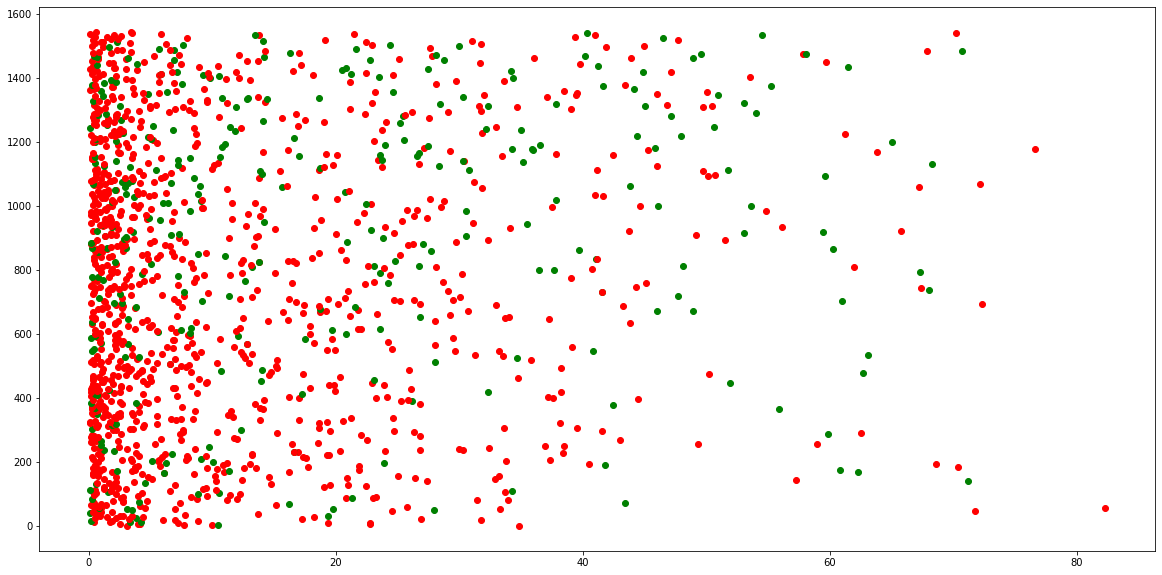

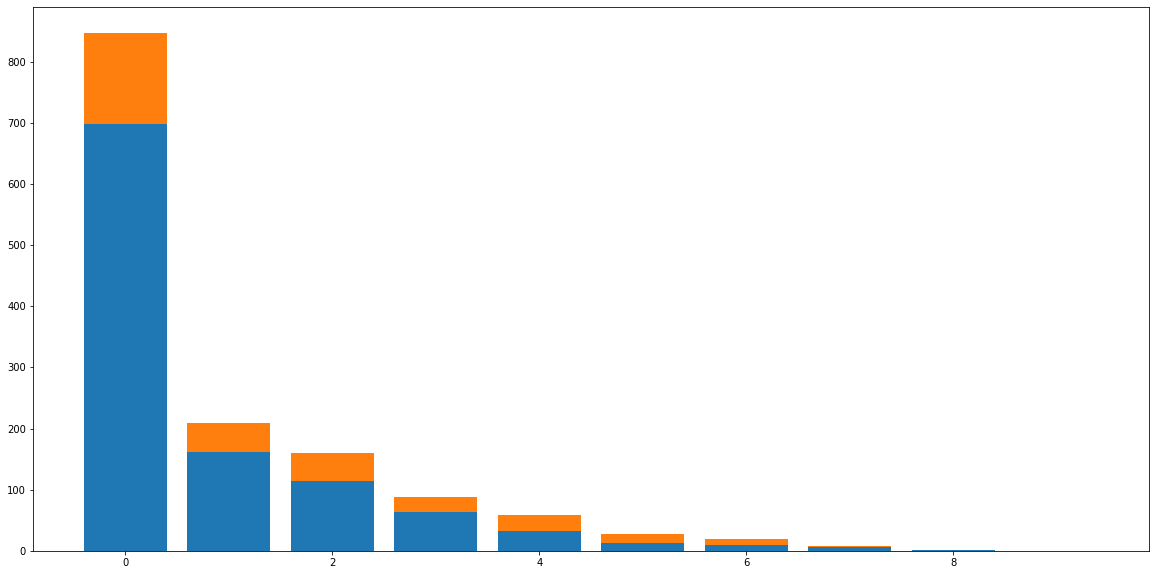

In [8]:
import time
import pandas
pyplot.figure(figsize=(20, 10))

numGroups = 10
groups = {'js' : [0] * numGroups, 'py': [0] * numGroups}


for index, row in polyglots.iterrows():
    javastart = row['java_start']
    langs = row['secondary_languages']
    starts = row['sec_start']
    period = pandas.Timestamp.today()-javastart
    #pyplot.plot_date([javastart, javastart], [0, index], '-b')
    for lang, start in zip(langs, starts):
        color = 'r' if lang == 'js' else 'g'
        delta = (start-javastart)
        if(delta > pandas.Timedelta(days=3)):
            percent = delta/period*100
            groups[lang][int(percent/numGroups)] = groups[lang][int(percent/numGroups)]+1
            pyplot.plot([percent], [index], 'o'+color)
            

pyplot.figure(figsize=(20, 10))
pyplot.bar(range(numGroups), groups['js'])
pyplot.bar(range(numGroups), groups['py'], bottom = groups['js'])

That is interesting, js devs clump at 10 percent - let's see if we can reproduce this with larger data set